In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import re

In [2]:
proteomes = pd.read_csv("data/77_cancer_proteomes_CPTAC_itraq.csv")
clinical_data = pd.read_csv("data/clinical_data_breast_cancer.csv")
pam50 = pd.read_csv("data/PAM50_proteins.csv")

In [3]:
proteomes.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [4]:
clinical_data

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
101,TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
102,TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1
103,TCGA-C8-A12W,FEMALE,49,Positive,Positive,Negative,T4,T_Other,N1,Positive,...,Luminal B,-5,-2,4,4,ReacII,3,4,1,1


### Reshaping the data

In [5]:
proteome_data = proteomes.iloc[:,3:] #only getting numerical features
proteome_data.head()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [6]:
reshaped_data = proteome_data.transpose()

In [7]:
reshaped_data.columns = proteomes.RefSeq_accession_number.tolist()
reshaped_data.head() #samples as rows and proteins as columns

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
AO-A12D.01TCGA,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
C8-A131.01TCGA,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997


In [8]:
#checking for null values

null_vals = reshaped_data.isna().sum()
print(null_vals)

NP_958782        0
NP_958785        0
NP_958786        0
NP_000436        0
NP_958781        0
                ..
NP_001191293    34
NP_775791       58
NP_004065       60
NP_068752       55
NP_219494       57
Length: 12553, dtype: int64


In [9]:
#removing features with more than 10 null values

na_val_index=null_vals[null_vals>10].index.tolist() 
comp_cases=[n for n in reshaped_data.columns if n not in na_val_index] 

In [10]:
len(comp_cases)

9537

In [11]:
#filtered dataset 

fl_data=reshaped_data[comp_cases]
fl_data.shape

(83, 9537)

In [12]:
#filling null values with mean

fl_data = fl_data.fillna(fl_data.mean())

### Scaling Data and Removing Outliers 

In [14]:
scaler=StandardScaler()
scaled_proteome=scaler.fit_transform(fl_data)
scaled_proteome=pd.DataFrame(scaled_proteome)
scaled_proteome.columns=fl_data.columns

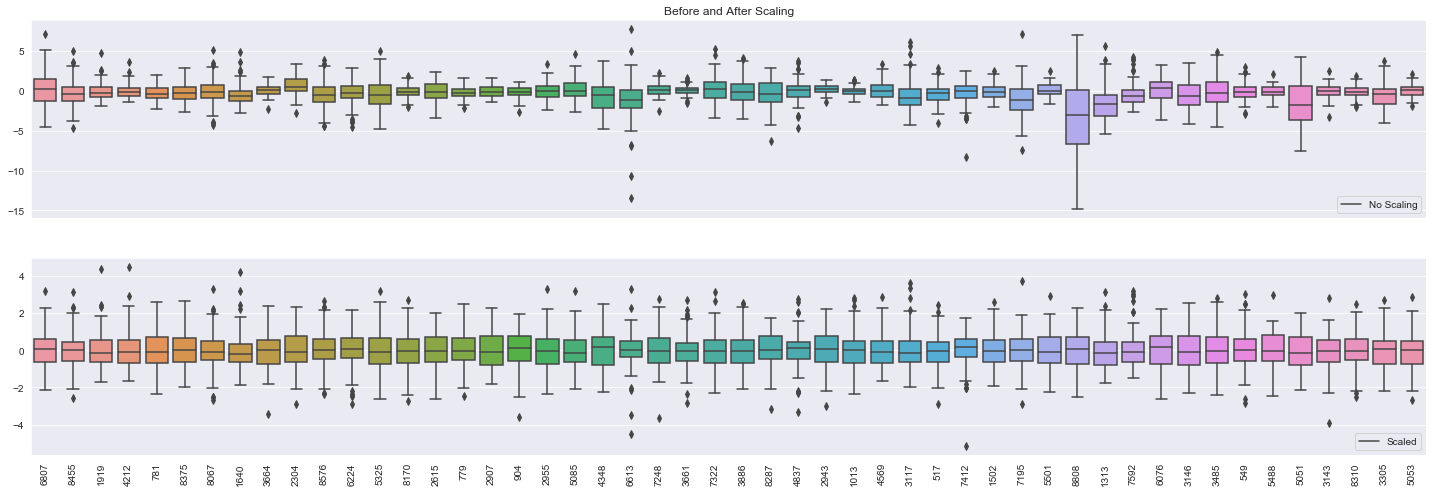

In [15]:
# visualizing data before and after scaling
sns.set_style('darkgrid')

x=[np.random.randint(0,9000) for n in range(50)]
data1=fl_data.iloc[:,x]
data2=scaled_proteome.iloc[:,x]
fig,axs=plt.subplots(2,sharex=True,figsize=(25,8))
ag=sns.boxplot(data=data1,ax=axs[0])
ag.legend(['No Scaling'],loc='lower right')
bg=sns.boxplot(data=data2,ax=axs[1])
bg.legend(['Scaled'],loc='lower right')
bg.set_xticklabels(x)
plt.xticks(rotation=90)
ag.set_title('Before and After Scaling')
plt.show()

In [16]:
# removing outliers

z_score = np.abs(stats.zscore(scaled_proteome))

threshold=3
z_bool=np.all(z_score<threshold,axis=0)

In [17]:
zscaled_proteome=scaled_proteome.loc[:,z_bool]
zscaled_proteome.shape

(83, 5284)

### Visualizing sample data

In [19]:
clinical_data.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [20]:
cancer_samples = clinical_data['Complete TCGA ID'].to_list()
len(cancer_samples)

105

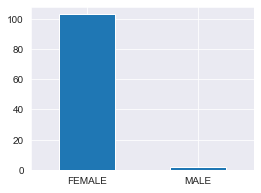

In [21]:
clinical_data.Gender.value_counts().plot(kind='bar',figsize=(4,3),rot=0)
plt.show()

In [22]:
def clinical_sample_format(row):
    
    row_list = row.split(".")
    sample_format = "TCGA-"+row_list[0]
    return sample_format

In [23]:
def condition(row):
    
    if row in cancer_samples:
        return "Cancer"
    else:
        return "Normal"

In [25]:
fl_data['Clinical_data_sample'] = fl_data.index.map(clinical_sample_format)
fl_data['Condition'] = fl_data.Clinical_data_sample.map(condition)

In [26]:
fl_data['Condition'].describe()

count         83
unique         2
top       Cancer
freq          80
Name: Condition, dtype: object

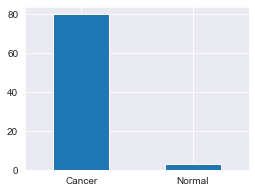

In [27]:
fl_data.Condition.value_counts().plot(kind='bar',figsize=(4,3),rot=0)
plt.show()